In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('cleaned_dataset/cleaned_outlier_train.csv')
test_df = pd.read_csv('cleaned_dataset/cleaned_test.csv')

In [3]:
train_df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
4,SHOE4FZGGTE7HJXN,33.0,2014-12-08 12:25:52.000,462,Zoe,No,Cosmetics,3,57,0.0,263.0,13.0,2006.0,5257.0,3874.264992


In [4]:
test_df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


Taking Date, year, month from `instock_data`

In [5]:
train_df['month'] = train_df['instock_date'].apply(lambda x: x.split('-')[1])
train_df['month']

0       08
1       03
2       08
3       03
4       12
        ..
5571    02
5572    03
5573    09
5574    02
5575    12
Name: month, Length: 5576, dtype: object

In [6]:
test_df['month'] = test_df['instock_date'].apply(lambda x: x.split('-')[1])
test_df['month']

0       01
1       08
2       11
3       11
4       05
        ..
3425    08
3426    12
3427    03
3428    05
3429    08
Name: month, Length: 3430, dtype: object

In [7]:
train_df['year'] = train_df['instock_date'].apply(lambda x: x.split('-')[0])
train_df['year']

0       2015
1       2016
2       2015
3       2016
4       2014
        ... 
5571    2016
5572    2016
5573    2015
5574    2015
5575    2015
Name: year, Length: 5576, dtype: object

In [8]:
test_df['year'] = test_df['instock_date'].apply(lambda x: x.split('-')[0])
test_df['year']

0       2016
1       2015
2       2015
3       2015
4       2015
        ... 
3425    2015
3426    2015
3427    2016
3428    2015
3429    2015
Name: year, Length: 3430, dtype: object

In [9]:
test_df['day'] = test_df['instock_date'].apply(lambda x: x.split('-')[0])
test_df['day']

0       2016
1       2015
2       2015
3       2015
4       2015
        ... 
3425    2015
3426    2015
3427    2016
3428    2015
3429    2015
Name: day, Length: 3430, dtype: object

In [10]:
train_df['day'] = train_df['instock_date'].apply(lambda x: x.split(' ')[0][8:])
train_df['day']

0       22
1       27
2       18
3       29
4       08
        ..
5571    07
5572    09
5573    23
5574    11
5575    08
Name: day, Length: 5576, dtype: object

Converting `Loyality Customers to 1-> loyal and 0-> Not loyal`

In [11]:
def loyality(column):    
    if 'No' in column:
        return 0     
    else:
        return 1

train_df['loyality_customers'] = train_df['Loyalty_customer'].apply(loyality)
test_df['loyality_customers'] = test_df['Loyalty_customer'].apply(loyality)

In [12]:
train_df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,month,year,day,loyality_customers
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,08,2015,22,1
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,03,2016,27,1
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,08,2015,18,1
3,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,03,2016,29,1
4,SHOE4FZGGTE7HJXN,33.0,2014-12-08 12:25:52.000,462,Zoe,No,Cosmetics,3,57,0.0,263.0,13.0,2006.0,5257.0,3874.264992,12,2014,08,0


**Ploting Charts for `train_df`**

<AxesSubplot:>

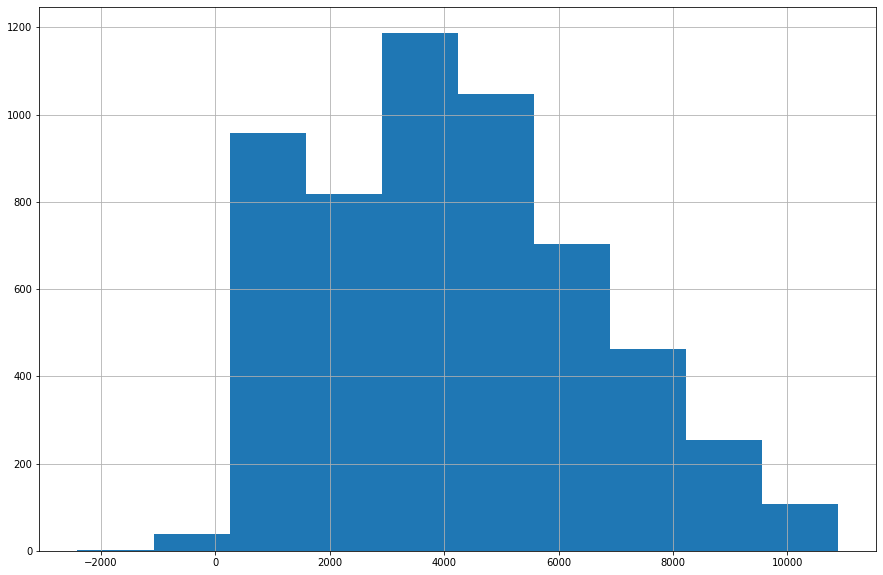

In [13]:
plt.figure(figsize=(15,10))
train_df.Selling_Price.hist()

<AxesSubplot:>

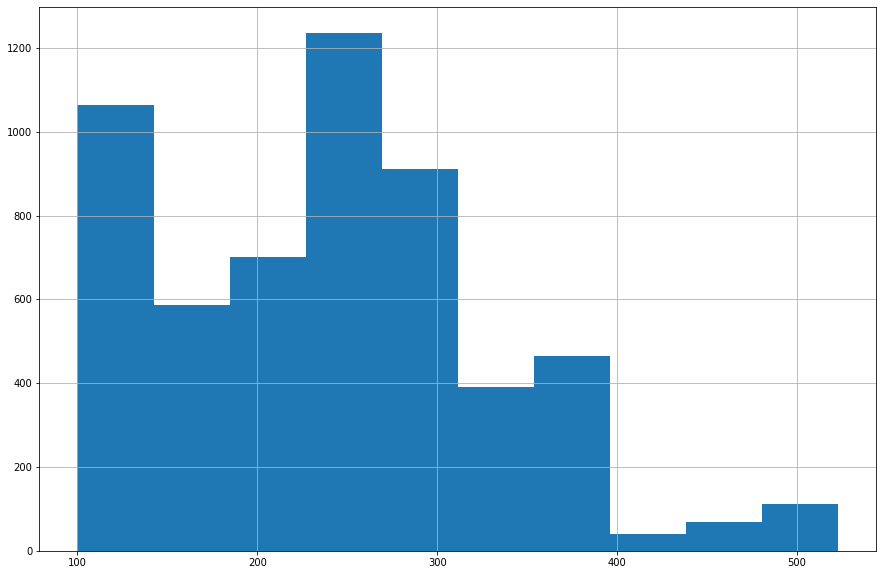

In [14]:
plt.figure(figsize=(15,10))
train_df.charges_1.hist()

<AxesSubplot:>

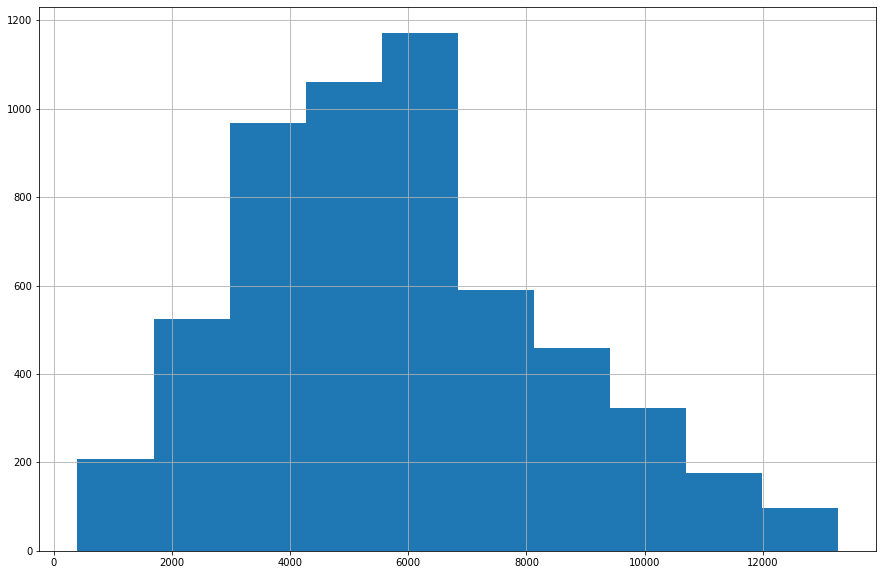

In [15]:
plt.figure(figsize=(15, 10))
train_df.Maximum_price.hist()

<AxesSubplot:xlabel='count', ylabel='Product_Category'>

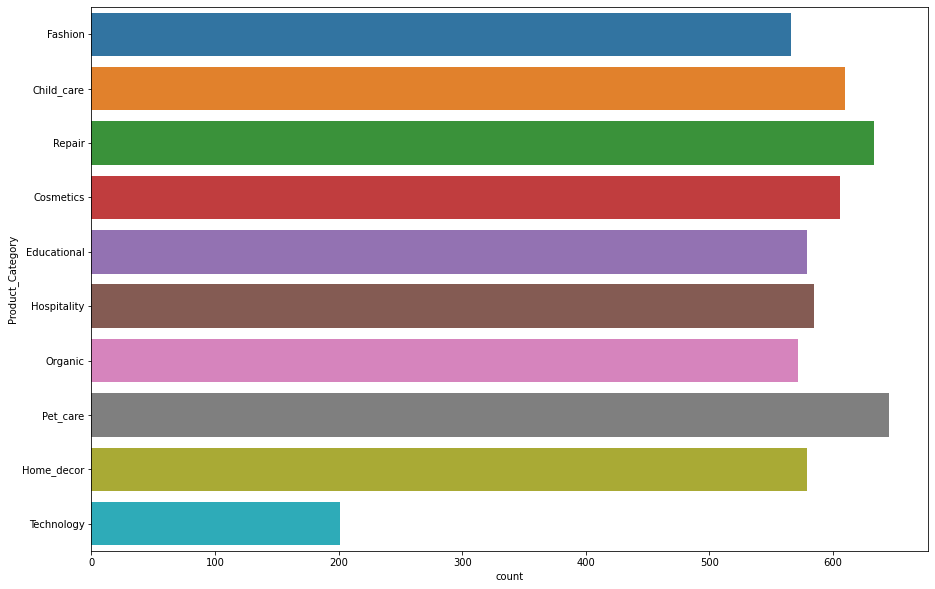

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_df, y='Product_Category')

In [17]:
train_df['loyality_customers'].value_counts()

1    3370
0    2206
Name: loyality_customers, dtype: int64

<AxesSubplot:xlabel='count', ylabel='loyality_customers'>

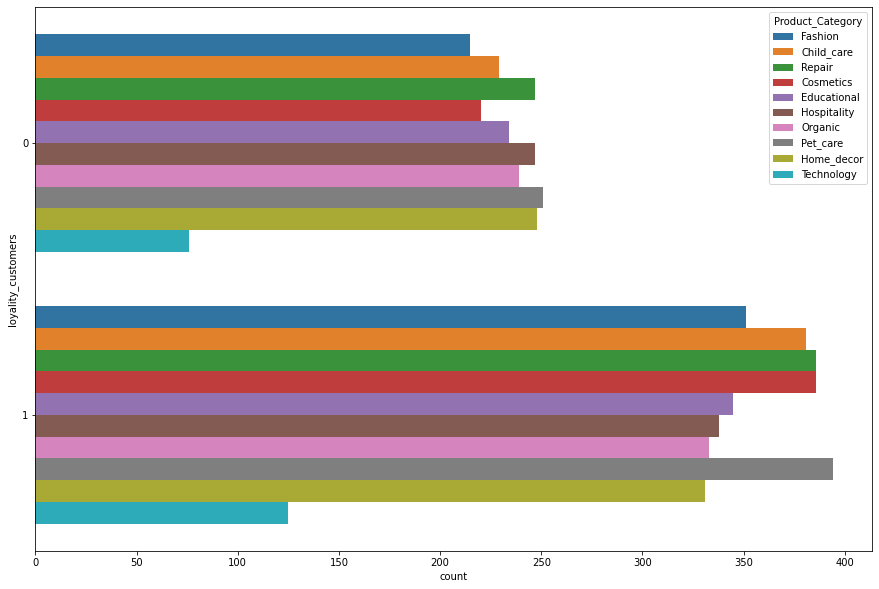

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_df, y='loyality_customers', hue='Product_Category')

<AxesSubplot:xlabel='count', ylabel='year'>

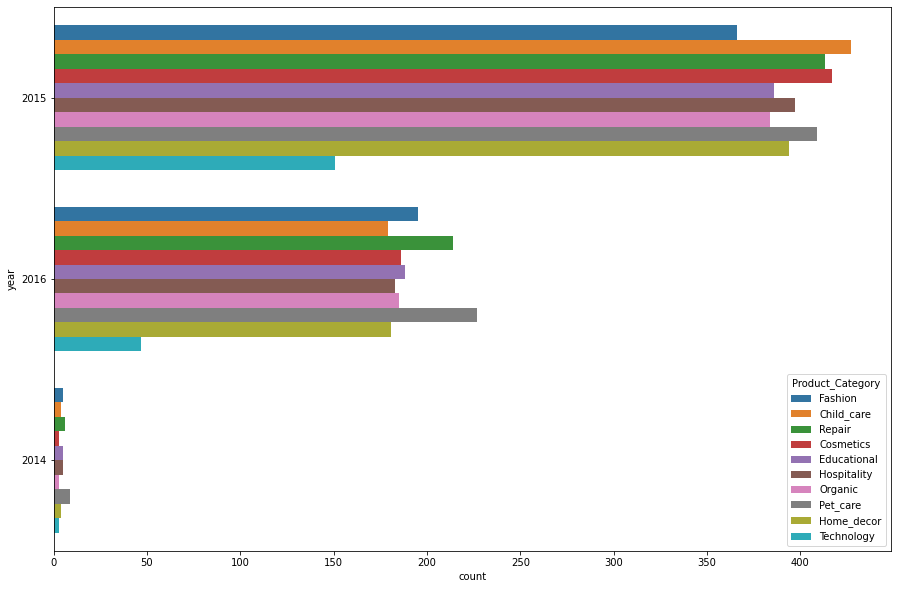

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_df, y='year', hue='Product_Category')

<Figure size 1440x1080 with 0 Axes>

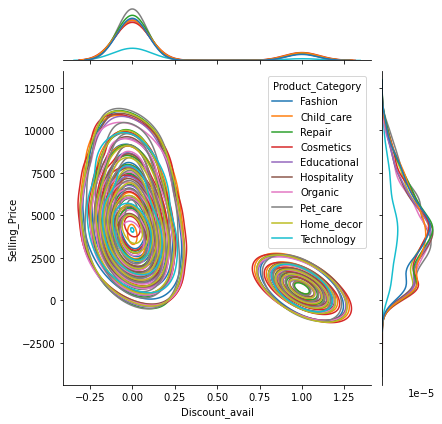

In [20]:
plt.figure(figsize=(20,15))
g = sns.jointplot(
    data = train_df,
    x = "Discount_avail", 
    y = "Selling_Price", 
    hue="Product_Category",
    kind="kde"
)

<AxesSubplot:xlabel='count', ylabel='Loyalty_customer'>

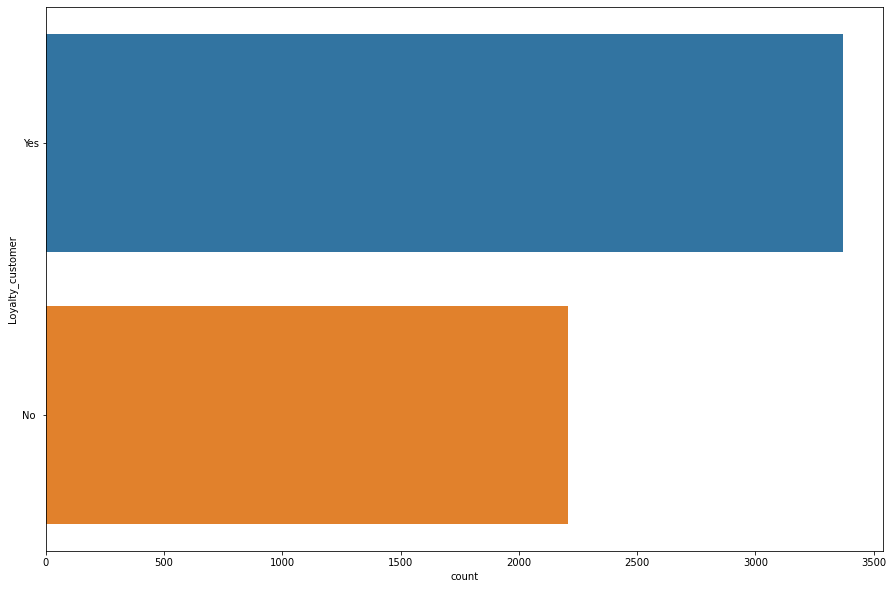

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_df, y='Loyalty_customer')

**Removing `Product_id, instock_date, customer_name, loyality_customer` columns**

In [22]:
train_df.drop(['Customer_name', 'Loyalty_customer', 'Product_id', 'instock_date'], axis=1, inplace=True)

In [23]:
train_df.head()

,Stall_no,Market_Category,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,month,year,day,loyality_customers
0,37.0,2,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,08,2015,22,1
1,38.0,24,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,03,2016,27,1
2,9.0,447,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,08,2015,18,1
3,7.0,63,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,03,2016,29,1
4,33.0,462,Cosmetics,3,57,0.0,263.0,13.0,2006.0,5257.0,3874.264992,12,2014,08,0


In [24]:
test_df.drop(['Customer_name', 'Loyalty_customer', 'Product_id', 'instock_date'], axis=1,
inplace=True)

In [25]:
test_df.head()

,Stall_no,Market_Category,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,month,year,day,loyality_customers
0,39.0,205,Fashion,0,90,0,380.0,16.0,2576.0,3340,01,2016,2016,0
1,49.0,3,Fashion,0,87,0,393.0,16.0,1202.0,1955,08,2015,2015,1
2,1.0,183,Technology,2,55,0,493.0,9.0,7175.0,15715,11,2015,2015,0
3,8.0,358,Child_care,3,86,0,303.0,16.0,5404.0,13078,11,2015,2015,1
4,33.0,167,Technology,0,27,0,567.0,16.0,4069.0,6244,05,2015,2015,0


**Getting Dummies from `Product_Category`**

In [26]:
train_dummy = train_df[['Product_Category']]
train_dummy = pd.get_dummies(train_dummy, drop_first=True)

test_dummy = test_df[['Product_Category']]
test_dummy = pd.get_dummies(test_dummy, drop_first=True)

In [27]:
train_df = pd.concat([train_df, train_dummy], axis=1)
test_df = pd.concat([test_df, test_dummy], axis=1)

In [28]:
train_df.head()

,Stall_no,Market_Category,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,...,loyality_customers,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology
0,37.0,2,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,...,1,0,0,1,0,0,0,0,0,0
1,38.0,24,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,...,1,0,0,1,0,0,0,0,0,0
2,9.0,447,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,...,1,0,0,0,0,0,0,0,0,0
3,7.0,63,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,...,1,0,0,0,0,0,0,0,1,0
4,33.0,462,Cosmetics,3,57,0.0,263.0,13.0,2006.0,5257.0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
test_df.head()

,Stall_no,Market_Category,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,...,loyality_customers,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology
0,39.0,205,Fashion,0,90,0,380.0,16.0,2576.0,3340,...,0,0,0,1,0,0,0,0,0,0
1,49.0,3,Fashion,0,87,0,393.0,16.0,1202.0,1955,...,1,0,0,1,0,0,0,0,0,0
2,1.0,183,Technology,2,55,0,493.0,9.0,7175.0,15715,...,0,0,0,0,0,0,0,0,0,1
3,8.0,358,Child_care,3,86,0,303.0,16.0,5404.0,13078,...,1,0,0,0,0,0,0,0,0,0
4,33.0,167,Technology,0,27,0,567.0,16.0,4069.0,6244,...,0,0,0,0,0,0,0,0,0,1


In [30]:
train_df.drop(['Product_Category'], axis=1, inplace=True)
test_df.drop(['Product_Category'], axis=1, inplace=True)

In [31]:
test_df.head()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,month,...,loyality_customers,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology
0,39.0,205,0,90,0,380.0,16.0,2576.0,3340,01,...,0,0,0,1,0,0,0,0,0,0
1,49.0,3,0,87,0,393.0,16.0,1202.0,1955,08,...,1,0,0,1,0,0,0,0,0,0
2,1.0,183,2,55,0,493.0,9.0,7175.0,15715,11,...,0,0,0,0,0,0,0,0,0,1
3,8.0,358,3,86,0,303.0,16.0,5404.0,13078,11,...,1,0,0,0,0,0,0,0,0,0
4,33.0,167,0,27,0,567.0,16.0,4069.0,6244,05,...,0,0,0,0,0,0,0,0,0,1


In [32]:
train_df.head()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,...,loyality_customers,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology
0,37.0,2,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,...,1,0,0,1,0,0,0,0,0,0
1,38.0,24,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,...,1,0,0,1,0,0,0,0,0,0
2,9.0,447,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,...,1,0,0,0,0,0,0,0,0,0
3,7.0,63,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,...,1,0,0,0,0,0,0,0,1,0
4,33.0,462,3,57,0.0,263.0,13.0,2006.0,5257.0,3874.264992,...,0,1,0,0,0,0,0,0,0,0


In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576 entries, 0 to 5575
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Stall_no                      5576 non-null   float64
 1   Market_Category               5576 non-null   int64  
 2   Grade                         5576 non-null   int64  
 3   Demand                        5576 non-null   int64  
 4   Discount_avail                5576 non-null   float64
 5   charges_1                     5576 non-null   float64
 6   charges_2 (%)                 5576 non-null   float64
 7   Minimum_price                 5576 non-null   float64
 8   Maximum_price                 5576 non-null   float64
 9   Selling_Price                 5576 non-null   float64
 10  month                         5576 non-null   object 
 11  year                          5576 non-null   object 
 12  day                           5576 non-null   object 
 13  loy

In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Stall_no                      3430 non-null   float64
 1   Market_Category               3430 non-null   int64  
 2   Grade                         3430 non-null   int64  
 3   Demand                        3430 non-null   int64  
 4   Discount_avail                3430 non-null   int64  
 5   charges_1                     3430 non-null   float64
 6   charges_2 (%)                 3430 non-null   float64
 7   Minimum_price                 3430 non-null   float64
 8   Maximum_price                 3430 non-null   int64  
 9   month                         3430 non-null   object 
 10  year                          3430 non-null   object 
 11  day                           3430 non-null   object 
 12  loyality_customers            3430 non-null   int64  
 13  Pro

In [35]:
train_df.to_csv('final_dataset/train.csv', index=False)
test_df.to_csv('final_dataset/test.csv', index=False)